# 04 - 그래프 인과 모형

## 인과에 대해 생각해보기

유튜브 영상에 나오는 요리사들이 얼마나 완벽하게 음식을 묘사하는지 알아차린 적 있나요?
"소스가 벨벳 같은 농도가 될 때까지 졸이세요". 당신이 막 요리를 배우는 중이라면, 이게 뭘 의미하는지 알 수도 없을 겁니다. 잠시 이걸 스토브 위에 둘 시간을 주세요.
인과성에도 마찬가지입니다. 당신이 바(bar)로 걸어 들어가서 사람들이 인과성에 대해 이야기하는 걸 듣는다고 가정해봅시다(아마 경제학과 옆에 있는 바겠죠). 그 경우, 당신은 아마 그들이 수입의 교란 효과가 이민 효과를 규명하는 것을 어떻게 어렵게 만들었고, 그래서 그들이 도구 변수를 사용해야만 했는지 듣게 될 겁니다. 그리고 지금 당신은 그들이 뭐라고 하는지 알아듣지 못할 겁니다. 그러나 제가 이 중 최소한 몇 개의 문제는 당장 해결해 줄 수 있어요. 

그래프 모델은 인과성의 언어입니다. 이것을 다른 용감하고 진실한 인과성의 팬들과 이야기할 때 사용할 수도 있지만 당신이 자신의 생각을 더 투명하게 만드는 데에도 사용할 수 있죠.

시작점으로서, 예를 들어 잠재적 결과의 조건부 독립을 가정해봅시다. 
이것은 우리가 인과 추론을 할 때 참으로 만들어야 하는 주요한 가정 중 하나입니다. 

$ (Y_0, Y_1) \perp T | X $

조건부 독립은 결과에 있어서 다른 숨어있는 변수들이 아닌 오직 처치에 의한 효과를 측정할 수 있게 만들어줍니다. 이에 대한 고전적인 예시는 아픈 환자에 대한 약의 효과입니다. 오로지 심각하게 아픈 환자들만 약을 먹는다면, 약을 처방하는 것이 환자의 건강을 악화시키는 것으로 보일 수도 있습니다. 그 이유는 병의 심각성이 약의 효과와 섞여버리기 때문이죠. 우리가 환자들을 심각한 케이스와 덜 심각한 케이스로 나누고 각 하위그룹에서의 약의 효과를 분석한다면, 우리는 실제 효과에 대한 더 명확한 그림을 얻을 것입니다. 모집단을 피쳐에 따라 나누는 것을 우리는 'X에 대한 통제' 혹은 'X에 대한 조건화(conditioning)'라고 부릅니다. 심각한 케이스에 대해 조건화함으로써, 처치 메커니즘이 무작위에 가까워집니다. 심각한 그룹에 속한 환자들은 이 차원에 대해 똑같기 때문에 더 이상 병증의 심각성에 따라서가 아니라 오직 우연에 의해 약을 받거나 받지 않게 됩니다. 그리고 처치가 그룹 내에서 무작위로 할당되면, 처치는 잠재적 결과와 조건부 독립이 됩니다. 

독립과 조건부 독립은 인과 추론의 핵심입니다. 그것을 이해기는 꽤 어려울 수 있습니다. 하지만 이러한 어려움은 우리가 문제를 묘사할 적절한 언어를 이용하면 해결할 수 있습니다. 여기가 바로 **인과 그래프 모형**이 필요한 지점입니다. 인과 그래프 모형은 무엇이 무엇을 유발하는지로 인과성이 작동하는 방식을 표현하는 방식입니다. 


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

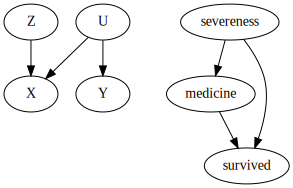

In [2]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

각 노드는 랜덤 변수입니다. 우리는 화살표, 또는 엣지를 사용해서 하나의 변수가 다른 것의 원인임을 나타냅니다. 위에서 첫 번째 그래프 모형은 Z가 X를 유발했고 U가 X와 Y를 유발했다고 말하고 있습니다. 더 확실한 예제로, 환자의 생존에 대한 약의 효과에 관한 우리의 생각을 번역해서 두 번째 그래프와 같이 나타낼 수 있습니다. 병의 심각성은 약과 생존 모두의 원인이 되고, 약은 생존의 원인이 됩니다. 앞으로 우리가 보게 될 것처럼, 인과 그래프 모형 언어는 우리가 인과성에 대해 더 분명하게 이해하도록 돕고, 세상이 어떻게 작동하는지에 대한 우리의 믿음도 명확하게 만들 것입니다.

## 그래프 모델에 대한 단기 특강

[그래프 모형에 대해서만 다루는 한 학기짜리 강좌](https://www.coursera.org/specializations/probabilistic-graphical-models)도 있습니다. 그러나 우리의 목적에서는 그래프 모형이 수반하는 독립성과 조건부 독립성 가정이 무엇인지에 대해 이해하는 것이 (매우) 중요합니다. 우리가 보게될 것처럼, 물이 개울을 따라 흐르는 것처럼 독립성은 그래프 모형을 따라 흐릅니다. 우리는 우리가 그 안에 속한 변수를 어떻게 다루느냐에 따라 이 흐름을 멈추거나 계속되게 만들 수 있습니다. 이를 이해하기 위해, 몇 개의 흔한 그래프 구조와 예시를 살펴볼 것입니다. 그들은 매우 직관적이지만, 그래프 모형의 독립과 조건부 독립에 대한 이해를 쌓아 올리기에는 충분할 것입니다. 

먼저, 이 매우 단순한 그래프를 봅시다. A가 B의 원인이고, B가 C의 원인이 됩니다. 혹은 Z의 원인인 Y의 원인이 X입니다. 

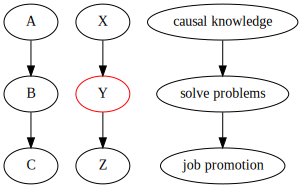

In [3]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")

g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

첫 번째 그래프에서, 의존성이 화살표의 방향을 따라서 흐릅니다. 직관적이지는 않지만, 의존성이 대칭적인 것을 눈여겨보세요. 더 확실한 예제로, 우리가 비즈니스 문제를 풀기 위한 유일한 방법이 인과 추론이고, 이 문제들을 푸는 게 승진하는 유일한 길이라고 해봅시다. 즉 인과 지식(을 가지고 있는 것)이 승진에 영향을 미치는 문제를 푸는 것을 함축합니다. 인과적 전문성이 클수록 당신이 승진할 가능성은 더 커집니다. 또한, 당신의 승진 가능성이 클수록 당신이 인과 지식을 가지고 있을 가능성도 큽니다. 그렇지 않으면 승진하기 어렵습니다.

이제 제가 매개 변수에 대해 조건화를 한다고 해보죠. 이 경우, 그 의존성이 차단됩니다(blocked). 즉 X와 Z는 Y가 주어졌을 때 서로 독립입니다. 위의 그래프에서 빨간색은 Y가 조건화된 변수임을 가리킵니다. 같은 이유로 우리의 예시에서 제가 당신이 문제를 푸는 데 능숙하다는 것을 안다면 당신이 인과 추론에 대해 안다는 것은 더 이상 당신의 승진 가능성에 대해 추가적인 정보를 주지 않습니다. 수학적인 용어로는
$ E[Promotion| Solve \ problems, Causal \ knowledge] = E[Promotion|Solve \ problems]$ 라고 할 수 있고, 이것의 역도 참입니다; 제가 당신이 문제를 얼마나 잘 푸는지 안다면, 당신의 승진 상태에 대해 아는 것은 제게 당신이 인과 추론에 대해 알 가능성에 대한 추가적인 정보를 주지 않습니다. 

일반적인 규칙으로서, 우리가 매개변수 B를 조건화하면 A에서 C로 향하는 직선에 흐르는 의존성이 차단됩니다. 이는 

$A \not \perp C $ 

그리고 

$ A \perp C|B $ 로 표현할 수 있습니다. 

이제, fork 구조에 대해 생각해봅시다. 그래프에서 같은 변수가 두 개의 다른 변수의 원인이 되고 있습니다. 이 경우, 의존성은 화살표의 역방향으로 흐르고, 우리는 **backdoor path**를 가지게 됩니다. 우리는 공통의 원인에 대해 조건화함으로써 backdoor path를 막고 의존성을 제거할 수 있습니다. 


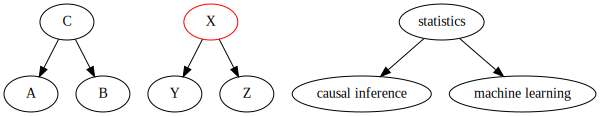

In [4]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", color="red")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

예를 들어, 통계학에 대한 당신의 지식이 당신이 인과추론과 기계학습에 대해 더 잘 알게 하는 원인이 된다고 합시다. 만약 제가 당신의 통계학 지식의 수준에 대해 알지 못한다면, 당신이 인과 추론에 능하다는 것을 안다면 당신이 기계학습에도 능할 가능성도 높다고 여길 것입니다. 이는 내가 당신의 통계학 지식수준을 모르더라도 당신의 인과추론 지식을 통해 그것을 추론할 수 있기 때문입니다. 만약 당신이 인과추론을 잘 안다면, 당신은 아마도 통계학도 잘 알 것이고,그럼 당신이 기계학습도 잘 알 가능성도 높을 것입니다. 

이제 만약 내가 당신의 통계학에 관한 지식을 조건화하면, 당신이 기계학습에 대해 얼마나 아는지는 당신이 인과추론에 대해 얼마나 아는지와 독립이 됩니다. 당신의 통계학 수준에 대해 아는 것이 저에게 당신의 기계학습 스킬 수준에 대해 추론하기 위해 필요한 모든 정보를 다 주었기 때문이죠. 당신의 인과추론 수준을 아는 것이 이 경우엔 추가적인 정보를 주지 않는다는 걸 알겠죠? 

일반적인 규칙으로서, 하나의 공통된 원인을 갖는 두 변수는 의존이지만, 우리가 공통의 원인을 조건화하면 독립이 됩니다. 혹은 

$A \not \perp B$

그리고

$ A \perp B|C $

로 나타낼 수 있습니다.

아직 다루지 않은 구조 하나는 collider입니다. collider는 두 개의 화살표가 하나의 변수에서 충돌하는 경우입니다. 이 경우 우리는 두 변수가 같은 효과를 공유한다고 말할 수 있습니다. 

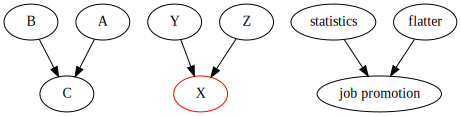

In [5]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

예를 들어, 우리가 승진하기 위한 두 개의 길이 있다고 칩시다. 통계학을 잘하거나 상사한테 아첨하는 것입니다. 만약 승진에 대해 조건화하지 않는다면, 당신이 승진할지 아닐지 전혀 알 수 없고, 당신의 통계학 수준과 아첨하는 것은 서로 독립이 됩니다. 다시 말해, 당신이 얼마나 통계학에 능한지를 아는 것은 당신이 상사한테 아첨을 얼마나 잘하는지 알려주는 바가 없습니다. 다른 한 편으로, 당신이 만약 승진했다면 갑자기 당신의 통계학 수준에 대해 아는 것이 당신의 아첨 수준에 대해서도 말해줍니다. 당신이 통계를 잘 못하는데 승진했다면, 당신은 아첨을 잘하는 사람일 것입니다. 그렇지 않았으면 승진하지 못했을 테니까요. 반대로 당신이 아첨을 잘 못한다면 당신은 통계를 잘할 것입니다. 이런 현상을 가끔 **잘 설명한다(explaining away)** 고 부르는데, 왜냐하면 하나의 원인이 이미 효과에 대해 설명함으로써 다른 원인의 가능성을 줄이기 때문입니다. 

일반적인 규칙으로, collider에 대해 조건화하는 것은 의존 경로(dependence path)를 열어줍니다. 조건화하지 않는 것은 닫힌 채로 두는 것이고요. 이는 

$A \perp B$ 

그리고 

$A \not \perp B | C$ 

로 나타낼 수 있습니다.

이 세 구조에 대해 앎으로써, 우리는 더 일반적인 규칙을 도출해낼 수 있습니다. 다음과 같은 경우에만 경로가 차단(blocked)된다고 할 수 있습니다:
1. 경로에 조건화된 non collider가 포함된다
2. 경로에 아직 조건화되지 않은 collider가 포함되고 조건화된 후손(descendants)을 가지지 않는다.

여기에 어떻게 그래프에서 의존성이 흐르는지에 대한 커닝 페이퍼가 있습니다. 이는 Mark Paskin의 [Stanford 발표](http://ai.stanford.edu/~paskin/gm-short-course/lec2.pdf)에서 가져왔습니다. 끝부분에 선이 그어진 화살표는 독립을 의미하고, 끝에 선이 없는 화살표는 의존을 의미합니다. 

![img](data/img/graph-flow.png)

마지막 예시로서, 다음의 인과 그래프에서 독립성과 의존성 관계를 찾아보세요.

1. Is $D \perp C $?
2. Is $D \perp C|A $?
3. Is $D \perp C|G $?
4. Is $A \perp F $?
5. Is $A \perp F|E $?
6. Is $A \perp F|E, C $?

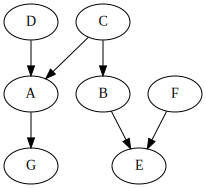

In [6]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

**정답:**
    
1. $D \perp C $ 입니다. 조건화 되지 **않은** collider를 가지고 있기 때문입니다. 
2. $D \not \perp C|A $ 입니다. 조건화된 collider를 가지고 있기 때문입니다.
3. $D \not \perp C|G $ 입니다. 조건화된 collider의 후손을 포함하고 있기 때문입니다. G를 A에 대한 일종의 proxy라고 볼 수 있습니다. 
4. $A \perp F $ 입니다. 조건화되지 **않은** collider인 B->E<-F를 포함하기 때문입니다. 
5. $A \not \perp F|E $ 입니다. 조건화된 collider은 B->E<-F를 포함하기 때문입니다. 
6. $A \perp F|E, C $ 입니다. 조건화된 collider은 B->E<-F를 포함하지만 조건화된 non collider도 포함하기 때문입니다. E에 대해 조건화 하는 것은 경로를 열어주지만, C에 대해 조건화하는 것은 이를 다시 닫아버립니다. 

인과 그래프 모형에 대해 아는 것은 인과 추론에서 발생하는 문제를 이해하게 해줍니다. 우리가 앞서 봤듯이, 문제는 항상 편향(bias)으로 귀결됩니다. 

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

그래프 모형은 우리가 어떤 편향을 다루고 있는지, 그것을 바로잡으려면 어떤 도구가 필요한지 진단하게 해줍니다. 


## 교란 편향

![img](./data/img/causal-graph/both_crap.png)

편향의 첫 번째 중요한 원인은 교란변수입니다. 이것은 처치와 결과가 같은 원인을 공유할 때 발생합니다. 예를 들어, 처치가 '교육'이고 결과가 '소득'이라고 해봅시다. 교육이 임금에 미치는 인과적 효과를 추정하기 어려운데, 이는 두 가지가 공통의 원인인 '지능'을 가지고 있기 때문입니다. 우리는 더 교육받은 사람들이 그저 더 똑똑하기 때문에 더 많은 돈을 버는 것이지, 교육을 더 받았기 때문이 아니라고 주장할 수 있습니다. 우리가 인과 효과를 규명하려면 처치와 결과 사이의 모든 backdoor path를 막아야 합니다. 만약 그렇게 하면, 남는 것은 오직 T -> Y의 직접적인 효과뿐일 것입니다. 우리의 예시에서, 우리가 지능 수준을 통제할 수 있다면(즉 동일 수준의 지능을 가지지만 교육 수준이 다른 사람들을 비교한다면) 모두 지능은 똑같기 때문에 결과의 차이는 오직 교육 수준의 차이에 의해 결정될 것입니다. 교란 변수를 제거하기 위해서 우리는 처치와 결과의 모든 공통된 원인을 통제해야 합니다. 

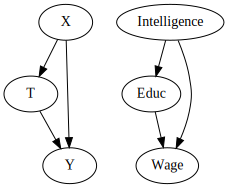

In [7]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Intelligence", "Educ"),
g.edge("Intelligence", "Wage"),
g.edge("Educ", "Wage")
g

불행하게도, 모든 공통 원인을 항상 다 통제할 수는 없습니다. 가끔 알려지지 않은 원인이나 알고 있지만 우리가 측정할 수 없는 원인도 있습니다. 지능의 경우에는 후자에 해당합니다. 많은 노력에도 불구하고 과학자들은 지능을 잘 측정할 방법을 밝혀내지 못했습니다. 이제 저는 'U'를 측정되지 않는 변수를 가리킬 때 사용하겠습니다. 이제 잠시 지능이 당신의 교육 수준에 직접적인 영향은 미치지 못한다고 가정해봅시다. 지능은 당신이 SAT 시험에서 얼마나 좋은 점수를 받을지에는 영향을 주지만, SAT는 좋은 대학에 갈 가능성을 열어서 교육 수준을 결정합니다. 우리가 측정 불가능한 지능을 통제할 수 없어도, 우리는 SAT 점수는 통제할 수 있고 backdoor path를 막을 수 있습니다. 

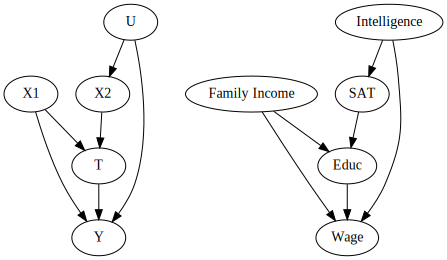

In [8]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")
g.edge("SAT", "Educ")
g.edge("Family Income", "Wage")
g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

다음 그래프에서, X1과 X2 혹은 SAT와 가족의 소득수준에 대해 조건화하는 것은 처치와 결과 사이의 모든 backdoor path를 막기에 충분합니다. 다시 말해, $(Y_0, Y_1) \perp T|X1, X2$ 입니다. 따라서 모든 공통의 원인을 다 측정하지 못한다고 하더라도 측정 불가능한 변수들이 처치에 미치는 영향을 매개하는 측정할 수 있는 변수들을 통제해서 여전히 조건부 독립을 달성할 수 있습니다. 빠르게 짚고 가면, 우리는 $(Y_0, Y_1) \perp T|X1, U$도 가지고 있지만 U를 관측할 수 없기 때문에 이에 대해서는 조건화할 수 없습니다. 

하지만 그런 경우가 아니라면? 만약 측정 불가한 변수가 처치와 결과의 직접적인 원인이 된다면 어떨까요? 다음에 올 예시에서, 지능은 교육과 소득의 원인이 됩니다. 따라서 처치인 교육과 결과인 임금의 관계 사이에 교란이 있는 것이죠. 이 경우 우리는 교란 변수가 측정할 수 없기 때문에 통제할 수도 없습니다. 그러나, 우리는 교란변수의 프록시가 되는 다른 측정된 변수를 가지고 있습니다. 그 변수들은 backdoor path에 있지 않지만, 그것들을 통제하는 것이 편향을 줄이는 데 도움이 됩니다(하지만 아예 제거할 수는 없습니다). 그 변수들을 때로는 대리 교란 변수라고도 부릅니다. 

우리의 예시에서, 우리는 지능을 측정할 수 없지만, 그것의 몇 가지 원인이 되는 부모님의 교육 수준이나 지능이 효과를 미치는 IQ나 SAT 점수 같은 것들을 측정할 수 있습니다. 대리 변수들을 통제하는 것은 편향을 아예 제거하는 데에는 충분하지 않지만 도움은 됩니다.

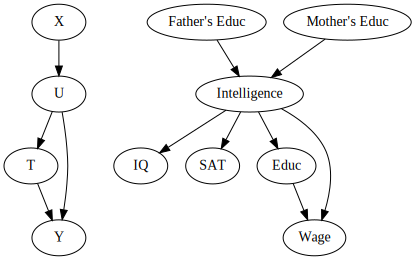

In [9]:
g = gr.Digraph()
g.edge("X", "U")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("Intelligence", "IQ")
g.edge("Intelligence", "SAT")
g.edge("Father's Educ", "Intelligence")
g.edge("Mother's Educ", "Intelligence")

g.edge("Intelligence", "Educ")
g.edge("Educ", "Wage")
g.edge("Intelligence", "Wage")

g

## 선택 편향

어쩌면 당신은 교란 편향(confounding bias)을 제거하기 위해 측정할 수 있는 모든 것들을 당신의 모델에 추가하는 게 좋은 아이디어라고 생각할 수도 있습니다. 글쎄요, 다시 생각해보죠.

![image.png](./data/img/causal-graph/selection_bias.png)

편향의 두 번째 중요한 원천은 우리가 '선택 편향'이라고 부를 것입니다. 여기서 저는 그것과 교란 편향의 구분이 구조적이라고 생각하기 때문에 그것을 고수할 것입니다. 교란 편향이 우리가 공통의 원인을 통제하지 않을 때 발생한다면, 선택 편향은 그것의 효과와 더 관련이 있습니다. 여기서 미리 주의를 주자면, 경제학자들은 모든 종류의 편향을 다 선택 편향이라고 부르는 경향이 있습니다.

자주, 선택 편향은 우리가 통제해야 하는 것보다 더 많은 변수를 통제할 때 발생합니다. 처치와 잠재적 결과가 주변적 독립(marginally independet)이지만 collider에 대해 조건화하면 의존이 되는 것도 하나의 케이스입니다. 

우리가 어떤 기적의 도움을 받아서 교육이 임금에 미치는 영향을 측정할 수 있게 무작위화가 가능해졌다고 상상해봅시다. 교란이 없음을 확신하기 위해서 당신은 여러 변수를 통제합니다. 그중에서 당신은 '투자'도 통제합니다. 하지만 투자는 교육과 임금의 공통 원인이 아닙니다. 대신 그것은 둘 모두의 결과에 가깝습니다. 또한 더 많이 버는 사람은 투자도 더 많이 합니다. 투자가 collider이기 때문에, 이에 대해 조건화함으로써 당신은 처치와 결과 사이에 두 번째 경로를 열게 되고, 이에 따라 직접적인 결과를 측정하기는 더 어려워집니다. 
이에 대해 생각하는 한 가지 방법은 투자를 통제함으로써 투자가 동일한 인구의 작은 그룹을 살펴본 다음 해당 그룹에 대한 교육의 효과를 찾는 것입니다. 그러나 그렇게 함으로써 당신은 또한 간접적으로 그리고 부주의하게 임금이 많이 변하지 않도록 만들고 있습니다. 결과적으로 임금이 원래 상태처럼 변화하는 것을 허용하지 않기 때문에 교육이 임금을 어떻게 변화시키는지 알 수 없게 됩니다. 

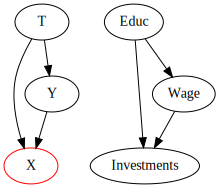

In [10]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="red")

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

왜 이런 일이 발생하는지 이해하기 위해 투자와 교육이 오직 2가지 값만 취한다고 상상해봅시다. 사람들이 투자를 하는지, 안 하는지입니다. 그들은 교육받거나, 받지 않았습니다. 초기에 우리가 투자를 통제하지 않았을 때 편향 항은 0입니다: $ E[Y_0|T=1] - E[Y_0|T=0] = 0 $ 왜냐하면 교육이 무작위화 되었기 때문입니다. 이는 사람들이 만약 교육받지 않았더라면 받았을 임금인 $Wage_0$가 당신이 교육이라는 처치를 받든 받지 않든 똑같다는 의미입니다. 하지만 우리가 투자를 조건화한다면 무슨 일이 발생할까요? 

투자를 한 사람들은, 다음과 같이 나타낼 수 있습니다. $E[Y_0|T=0, I=1] > E[Y_0|T=1, I=1]$. 즉 투자하는 사람들 중 교육 없이도 투자하는 사람들이 높은 수입을 얻기 위해 교육에 대해 더 독립적입니다. 이러한 이유로, 그 사람들이 받는 임금인 $Wage_0|T=0$은 교육받은 그룹이 교육받지 않았더라면 받았을 임금 $Wage_0|T=1$보다 더 높을 것입니다. 비슷한 추론을 투자를 하지 않는 사람들에 대해서도 적용할 수 있는데, $ E[Y_0|T=0, I=0] > E[Y_0|T=1,I=0]$와 같습니다. 교육을 받고도 투자하지 않은 사람들은 그들이 교육받지 않았더라면 교육받지 않고 투자하지 않은 사람들보다 더 낮은 임금을 받았을 가능성이 높습니다.

순수하게 그래프적 주장을 사용하면, 누군가 투자를 한다면 그가 높은 학력을 가진 것을 아는 것이 두 번째 원인인 임금을 잘 설명하게 됩니다. 투자에 대해 조건화했을 때, 교육 수준이 높은 것은 낮은 임금과 연관되어 있고, 우리는 음수 편향 $E[Y_0|T=0, I=i] > E[Y_0|T=1, I=i]$를 갖게 되죠.

부가적인 설명으로써, 지금까지 우리가 논의한 모든 것들은 우리가 공통의 효과의 아무 후손(descendent)에 대해 조건화할 경우 모두 참이 됩니다.  

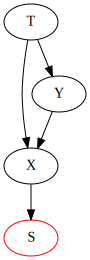

In [11]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.edge("X", "S")
g.node("S", "S", color="red")
g

비슷한 일이 우리가 처치에 대한 매개변수(mediator)를 조건화할 때에도 발생합니다. 매개변수란, 처치와 결과 사이에 존재하는 변수입니다. 그것은 인과적 효과를 매개합니다. 예를 들어 다시 우리가 교육 수준을 무작위화 할 수 있다고 합시다. 그러나 당신은 어떤 사람이 화이트칼라 직업을 가졌는지 아닌지만 통제하기로 했습니다. 다시 한번 이러한 조건화는 인과 효과 추정에 편향을 만듭니다. 이번에는, 그것이 collider에 대해 front door path를 열어서가 아니라 처치가 작용하는 채널 중 하나를 막아버리기 때문입니다. 우리의 예시에서, 화이트칼라 직업을 가지는 것은 교육이 더 높은 임금으로 가는 길에 있습니다. 이를 통제함으로써, 우리는 이 채널을 막고 교육이 임금에 미치는 직접적인 효과만을 열린 채로 둘 수 있습니다. 

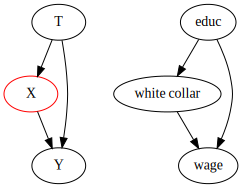

In [12]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", color="red")

g.edge("educ", "white collar")
g.edge("educ", "wage")
g.edge("white collar", "wage")

g

잠재적 결과 주장을 하자면, 우리는 무작위화 때문에 편향이 0이 된다는 것을 알고 있습니다. $E[Y_0|T=0] - E[Y_0|T=1] = 0$. 그러나, 만약 우리가 화이트칼라 직업을 가진 개인에 대해 조건화한다면, $E[Y_0|T=0, WC=1] > E[Y_0|T=1, WC=1]$ 이렇게 됩니다. 이것은 교육 없이도 화이트칼라 직업을 얻을 수 있는 사람은 똑같은 직업을 얻기 위해 교육의 도움을 필요로하는 사람보다 더 열심히 일하는 사람일 가능성이 높기 때문입니다. 같은 방식으로 추론하면, $E[Y_0|T=0, WC=0] > E[Y_0|T=1, WC=0]$ 인데 이는 교육을 받고도 화이트칼라 직업을 얻지 못한 사람은 교육을 받지 않고 화이트칼라 직업을 얻지 못한 사람보다 덜 열심히 일하는 사람일 가능성이 높기 때문입니다.

우리의 경우, 매개변수에 대해 조건화하는 것은 음수 편향을 유발합니다. 이는 교육의 효과를 실제보다 더 작아 보이게 만듭니다. 왜냐하면 인과 효과가 양수이기 때문입니다. 만약 효과가 음인 경우 매개변수에 대한 조건화는 양의 편향을 가질 것입니다. 모든 경우에 이러한 종류의 조건화는 효과를 실제보다 약해 보이게 만듭니다.

좀 더 단조롭게 표현해서 회사에서 두 명의 후보자 중 한 명을 선택해야 한다고 가정해 보겠습니다. 둘 다 똑같이 인상적인 직업적 성취를 가지고 있지만, 하나는 더 높은 교육 학위를 가지고 있지 않습니다. 당신은 어느 쪽을 선택해야 할까요? 당연히 고등 교육을 받지 못한 사람을 선택해야 합니다. 왜냐하면 그는 다른 사람과 같은 일을 달성했지만 그에게 불리한 확률이 있었기 때문입니다.

![image.png](./data/img/causal-graph/three_bias.png)

## 핵심 아이디어

우리는 인과적 아이디어를 더 잘 이해하고 표현하기 위한 언어로서 그래프 모델들을 공부했습니다. 우리는 그래프에서의 조건부 확률의 규칙에 대해 빠르게 요약해봤고, 편향으로 이어질 수 있는 세 가지 구조에 대해 탐색할 수 있었습니다.

첫 번째는 교란(confounding)인데, 처치와 결과가 우리가 계산하거나 통제할 수 없는 공통의 원인을 가지고 있을 때 발생합니다. 두 번쨰는 선택 편향(selection bias)인데, 동일한 효과에 대한 조건화로 인해 발생합니다. 세 번째 구조는 선택 편향의 한 형태인데, 이번에는 매개 변수에 대한 과도한 통제로 발생합니다. 이런 과도한 통제로 발생한 편향은 처치가 무작위로 할당된다고 하더라도 발생할 수 있습니다. 선택 편향은 종종 그저 아무것도 하지 않음으로써 고칠 수도 있지만, 우리는 행동에 편향되어 있기 때문에 사물을 통제하는 아이디어가 득보다 실이 많을 때도 그것을 영리하다고 보는 경향이 있습니다.

## 참고 문헌

나는 이 책 전체를 Joshua Angrist, Alberto Abadie, Christopher Walters의 놀라운 계량경제학 수업에 대한 찬사라고 생각하고 싶습니다. 여기에 있는 대부분의 아이디어는 미국 경제 협회(American Economic Association)의 수업에서 가져왔습니다. 그들을 지켜보는 것이 2020년의 힘든 한 해 동안 저를 제정신으로 유지하는 것입니다.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

나는 또한 Angrist의 놀라운 책들을 참조하고 싶습니다. 그들은 계량경제학(Econometrics) 또는 그들이 부르는 대로 '매트릭스(Metrics)가 매우 유용할 뿐만 아니라 매우 재미있다는 것을 저에게 보여주었습니다.

* [대체로 무해한 계량경제학](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

내 마지막 참조는 Miguel Hernan과 Jamie Robins의 책입니다. 그것은 내가 대답해야 했던 가장 어려운 인과적 질문에서 나의 신뢰할 수 있는 동반자였습니다.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

![img](./data/img/poetry.png)

## 기여하기

Causal Inference for the Brave and True는 과학의 통계인 인과 추론에 대한 오픈 소스 자료입니다. 그 목표는 금전적으로나 지적으로 접근할 수 있도록 하는 것입니다. Python 기반의 무료 소프트웨어만 사용합니다.
이 책이 가치 있다고 생각하고 지원하고 싶다면 [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true)으로 이동하십시오. 재정적으로 기여할 준비가 되지 않았다면 오타를 수정하거나 수정 사항을 제안하거나 이해하지 못한 구절에 대한 피드백을 제공하여 도움을 줄 수도 있습니다. 책의 저장소로 이동하여 [이슈를 열어주세요.](https://github.com/matheusfacure/python-causality-handbook/issues). 마지막으로, 이 콘텐츠가 마음에 들면 도움이 될 만한 다른 사람들과 공유하고 [GitHub에서 star 누르기](https://github.com/matheusfacure/python-causality-handbook/stargazers)를 해주세요.